<a href="https://colab.research.google.com/github/fnmolina/neural-networks-classification-regression-project/blob/main/2_SoftmaxRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Softmax Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helper import *

In [2]:
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, BatchNormalization, Dropout, Flatten, Activation
from keras import optimizers
from keras.metrics import SensitivityAtSpecificity
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, Callback
from keras.utils import np_utils
import keras.backend as K
import datetime

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc, roc_auc_score
from itertools import cycle


In [3]:
from keras.datasets import fashion_mnist
(x_data, y_data), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

# 20% del dataset para validación
validation = 0.20
N_validation_split = int(x_data.shape[0]*(1-validation))
# Training Set
x_train = x_data[:N_validation_split]
y_train = y_data[:N_validation_split]

# Cross Validation Set
x_val = x_data[N_validation_split:]
y_val = y_data[N_validation_split:]

# Data normalization 
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### One hot encoding

In [4]:
y_train_categorical = np_utils.to_categorical(y_train)
y_val_categorical = np_utils.to_categorical(y_val)
print(y_train_categorical.shape)
for i in range(10):
    print(y_train[i], y_train_categorical[i])

(48000, 10)
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Softmax regression:

In [5]:
K.clear_session()

model_softmax = classification_model(     x_train.shape,
                                    output_size = 10,
                                    hidden_layers_size = 0, 
                                    hidden_layers_units = [0],
                                    hidden_activation = 'sigmoid',
                                    kernel_initializer= 'random_normal',
                                    dropout_rate = 0.0,
                                    regularizer = None,
                                    regularizer_rate = 0.001,
                                    bias_initializer = 'zeros',
                                    use_batch_normalization=False,
                                    lr = 0.001,
                                    decay = 0, 
                                    out_softmax = True)
model_softmax.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Output (Dense)              (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Accuracy of model previous to training

In [6]:
score = model_softmax.evaluate(x_val, y_val_categorical, verbose=0)
print("loss: ", score[0])
print("accuracy: ", score[1])

loss:  2.5821616649627686
accuracy:  0.0520833320915699


### Let's train (compile) this model:
This model has an early stopping callback.

In [7]:
model_trained = model_softmax.fit(      x_train, 
                        y_train_categorical,
                        epochs=500, batch_size=128, 
                        verbose=1, 
                        validation_data = (x_val, y_val_categorical),
                        callbacks=[callback_EarlyStopping()],
                      )

Epoch 1/500
375/375 [==============================] - 2s 4ms/step - loss: 0.7935 - accuracy: 0.7404 - f1_m: 0.6649 - precision_m: 0.8475 - recall_m: 0.5690 - val_loss: 0.5757 - val_accuracy: 0.8106 - val_f1_m: 0.7866 - val_precision_m: 0.8811 - val_recall_m: 0.7109
Epoch 2/500
375/375 [==============================] - 1s 3ms/step - loss: 0.5388 - accuracy: 0.8211 - f1_m: 0.8059 - precision_m: 0.8812 - recall_m: 0.7431 - val_loss: 0.5117 - val_accuracy: 0.8266 - val_f1_m: 0.8135 - val_precision_m: 0.8820 - val_recall_m: 0.7553
Epoch 3/500
375/375 [==============================] - 1s 4ms/step - loss: 0.4904 - accuracy: 0.8359 - f1_m: 0.8266 - precision_m: 0.8858 - recall_m: 0.7753 - val_loss: 0.4900 - val_accuracy: 0.8345 - val_f1_m: 0.8260 - val_precision_m: 0.8849 - val_recall_m: 0.7748
Epoch 4/500
375/375 [==============================] - 1s 3ms/step - loss: 0.4665 - accuracy: 0.8429 - f1_m: 0.8362 - precision_m: 0.8874 - recall_m: 0.7910 - val_loss: 0.4638 - val_accuracy: 0.8416 

313/313 [==============================] - 1s 3ms/step
Softmax Regression:
  Accuracy: 0.8577499985694885
  Loss: 0.4119657278060913
  Precision: 0.8854935765266418
  Recall: 0.829454779624939
  F1-score: 0.8564468026161194
  ROC AUC: 0.9835275999999998


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

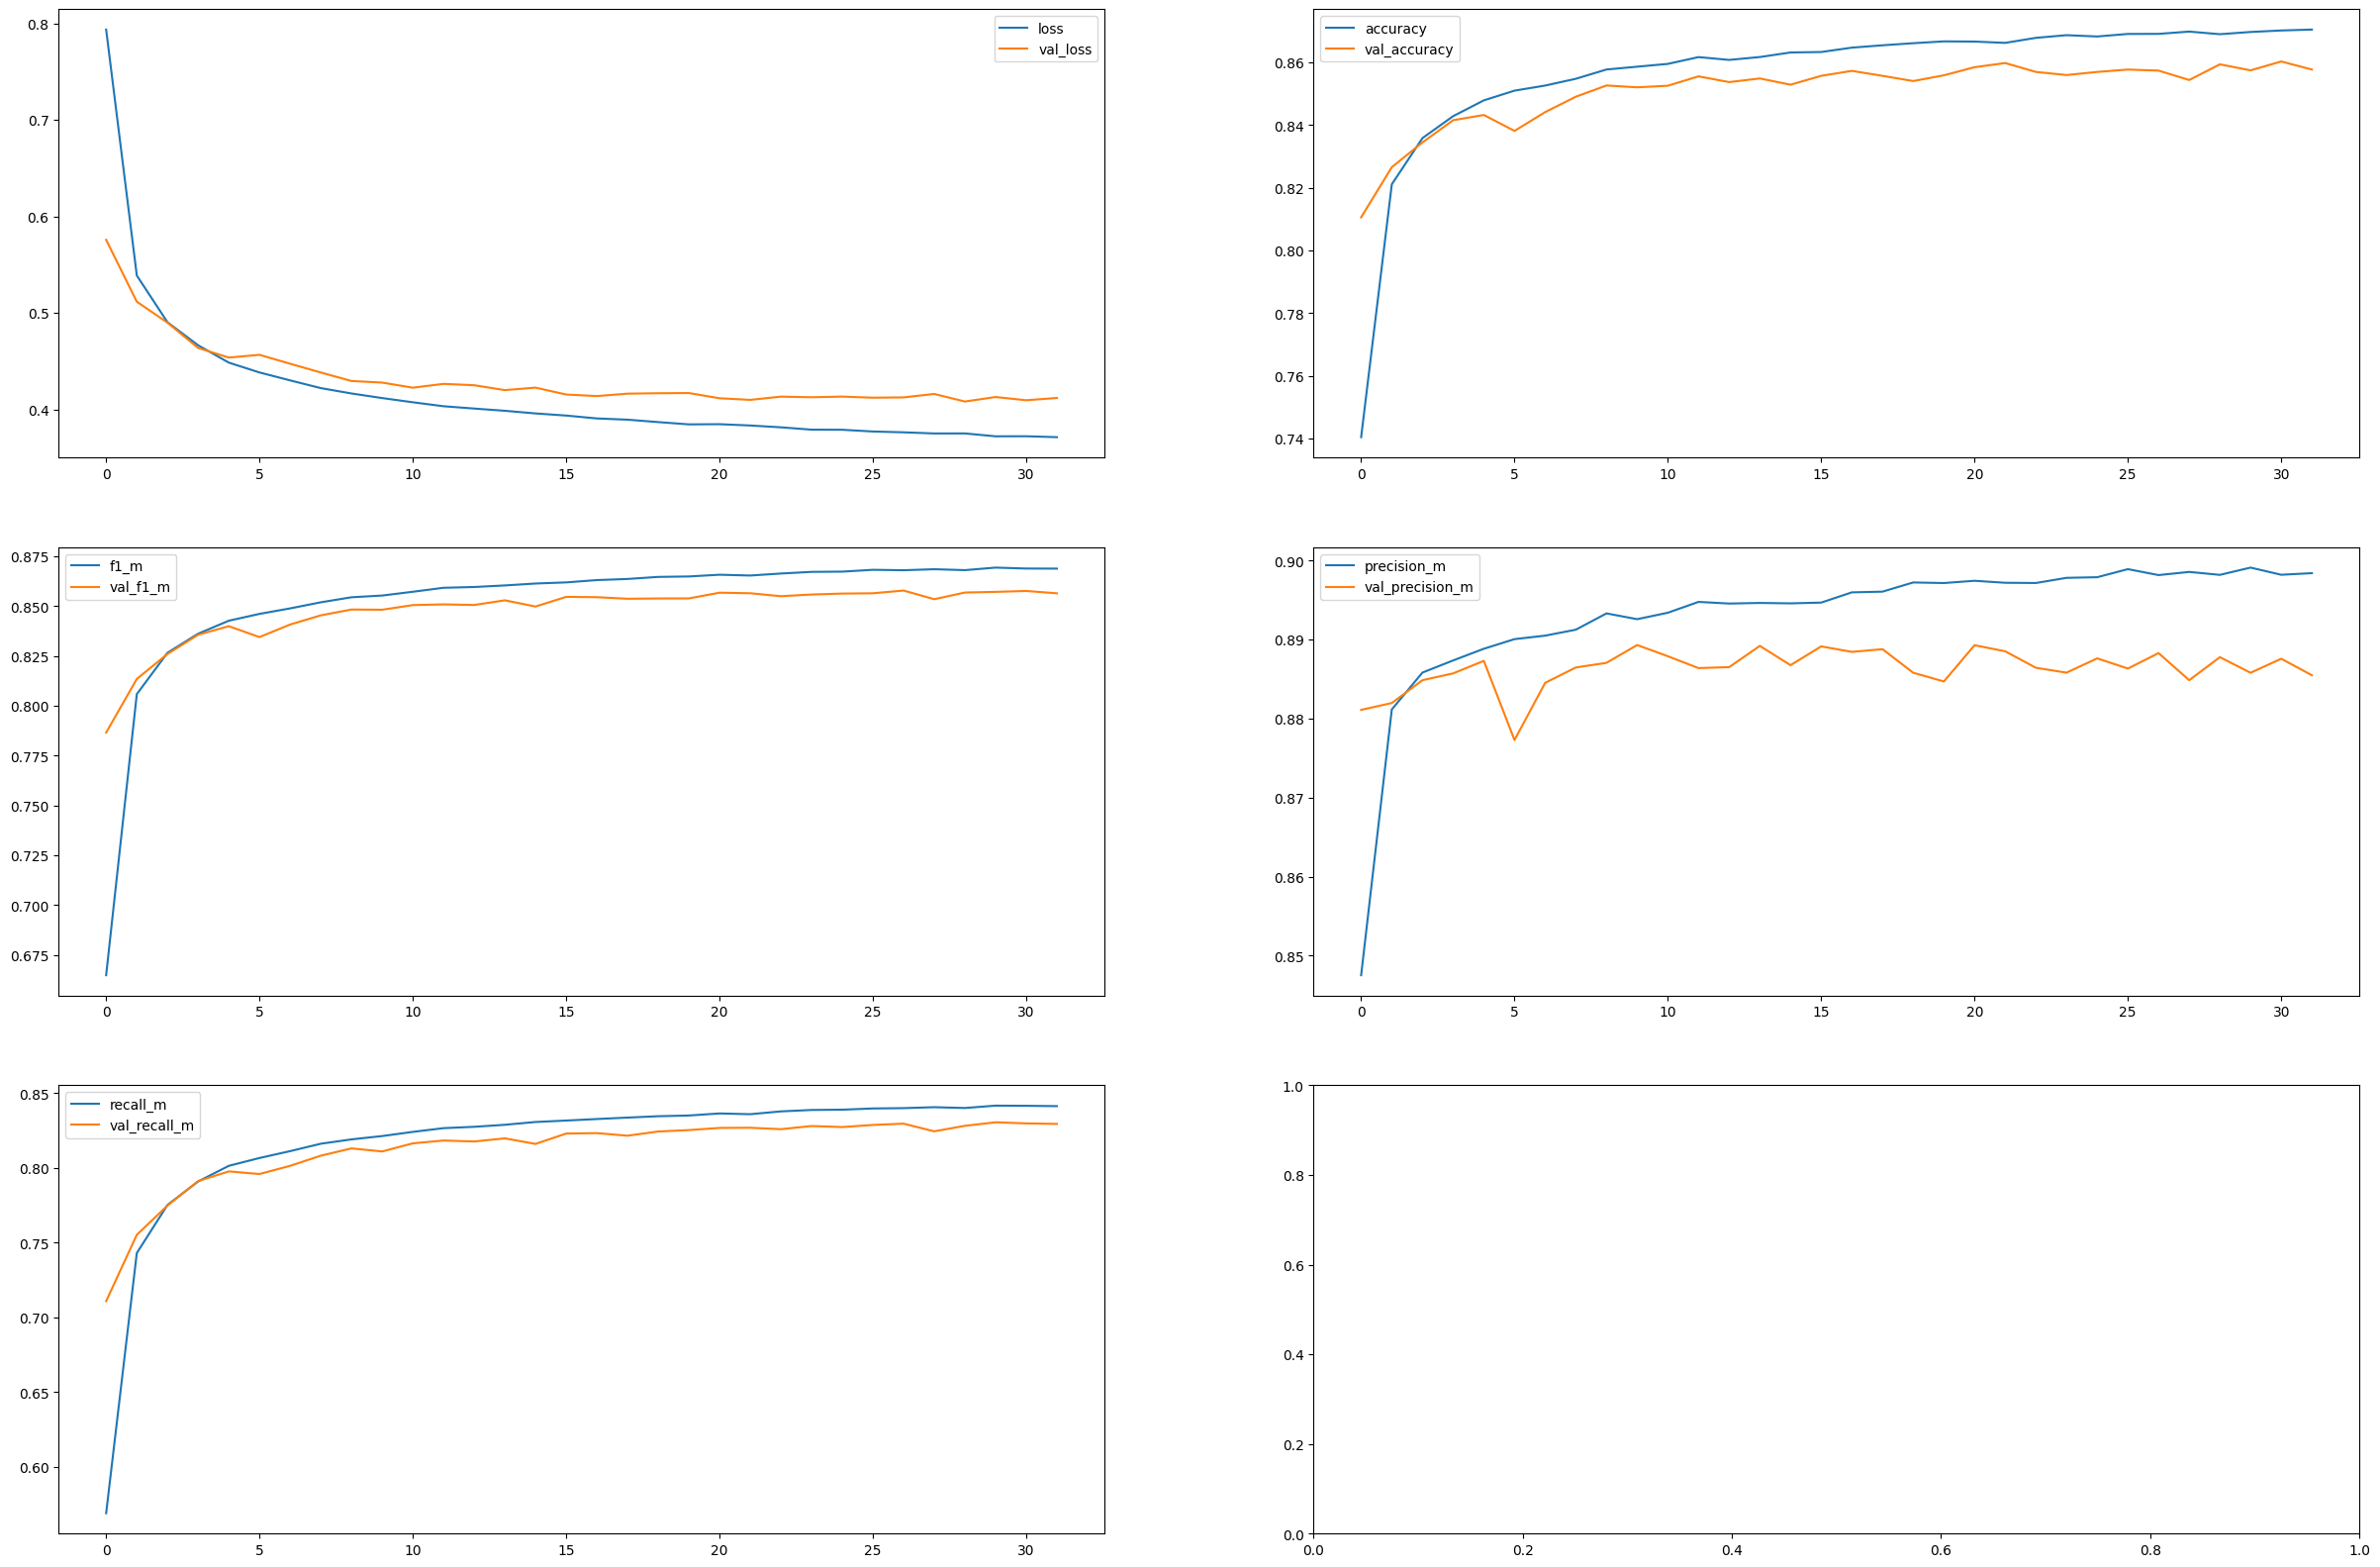

In [38]:
y_pred= model_softmax.predict(x_test)

# Print the evaluation metrics
print("Softmax Regression:")
print("  Accuracy:", model_trained.history['val_accuracy'][-1])
print("  Loss:", model_trained.history['val_loss'][-1])
print("  Precision:", model_trained.history['val_precision_m'][-1])
print("  Recall:", model_trained.history['val_recall_m'][-1])
print("  F1-score:", model_trained.history['val_f1_m'][-1])
print("  ROC AUC:", roc_auc_score(y_test, y_pred, multi_class='ovr', average="macro"))


metrics = [[['loss', "loss"],['val_loss',"val_loss"]],
            [['accuracy', "accuracy"],['val_accuracy', "val_accuracy"]],
            [['f1_m', "f1_m"],['val_f1_m', "val_f1_m"]],
            [['precision_m', "precision_m"],['val_precision_m', "val_precision_m"]],
            [['recall_m', "recall_m"],['val_recall_m', "val_recall_m"]],
            [['', ""],['', ""]]]

f, axis = plt.subplots(3, 2, figsize=(30, 20))
k = 0
for i in range(4):
    for j in range(2):
        if(k != 5):
            axis[i,j].plot(model_trained.history[metrics[k][0][0]], label = metrics[k][0][1])
            axis[i,j].plot(model_trained.history[metrics[k][1][0]], label = metrics[k][1][1])
            axis[i,j].legend()
        else:
            lw=2
            fpr, tpr, roc_auc = plot_ROC(y_test, y_pred.ravel(), class_names)
            axis[i,j].plot(fpr["micro"], tpr["micro"],
                        label='micro-average ROC curve (area = {0:0.2f})'
                            ''.format(roc_auc["micro"]),
                        color='deeppink', linestyle=':', linewidth=4)

            axis[i,j].plot(fpr["macro"], tpr["macro"],
                        label='macro-average ROC curve (area = {0:0.2f})'
                            ''.format(roc_auc["macro"]),    
                        color='navy', linestyle=':', linewidth=4)

            colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'yellow', 'purple', 'pink', 'brown', 'gray'])
            for i, color in zip(range(len(class_names)), colors):
                axis[i,j].plot(fpr[i], tpr[i], color=color, lw=lw,
                            label='ROC curve of class {0} (area = {1:0.2f})'
                            ''.format(class_names[i], roc_auc[i]))
                
            axis[i,j].plot([0, 1], [0, 1], 'k--', lw=lw)
            axis[i,j].xlim([-0.01, 1.0])
            axis[i,j].ylim([0.0, 1.01])
            axis[i,j].xlabel('False Positive Rate')
            axis[i,j].ylabel('True Positive Rate')
            axis[i,j].title('ROC curve')
            axis[i,j].legend(loc="lower right")
        k += 1

    

array([2.3680956e-07, 1.7964787e-09, 6.5125737e-06, 4.2540823e-06,
       4.7616845e-06, 9.9350937e-02, 2.4431576e-05, 8.1017531e-02,
       3.4444123e-03, 8.1614697e-01], dtype=float32)